<a href="https://colab.research.google.com/github/garretbassett/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Garret_Bassett_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
##### LOAD DATA

import pandas as pd
import numpy as np

votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
                    , header=None
                    , index_col = False
                    , names=['party'
    , 'handicapped-infants'
    , 'water-project-cost-sharing'
    , 'adoption-of-the-budget-resolution'
    , 'physician-fee-freeze'
    , 'el-salvador-aid'
    , 'religious-groups-in-schools'
    , 'anti-satellite-test-ban'
    , 'aid-to-nicaraguan-contras'
    , 'mx-missile'
    , 'immigration'
    , 'synfuels-corporation-cutback'
    , 'education-spending'
    , 'superfund-right-to-sue'
    , 'crime'
    , 'duty-free-exports'
    , 'export-administration-act-south-africa'])

print(votes.shape)
votes.head()

(435, 17)


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
##### CLEAN DATA - REPLACE VALUES

new_vals = {'y': 1, 'n': 0, '?': None}
votes = votes.replace(new_vals)

votes.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [0]:
for col in votes.columns[1:]:
    if votes[col].isna().sum() < len(votes) / 10:
        votes[col].fillna(votes[col].mean(), inplace = True)
    else:
        votes = votes.drop(col, axis = 1)
        
votes.head()

,party,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
0,republican,0.00000,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0
1,republican,0.00000,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0
2,democrat,0.44208,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0
3,democrat,0.00000,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0
4,democrat,1.00000,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0


In [116]:
votes.isna().sum()

party                                0
handicapped-infants                  0
adoption-of-the-budget-resolution    0
physician-fee-freeze                 0
el-salvador-aid                      0
religious-groups-in-schools          0
anti-satellite-test-ban              0
aid-to-nicaraguan-contras            0
mx-missile                           0
immigration                          0
synfuels-corporation-cutback         0
education-spending                   0
superfund-right-to-sue               0
crime                                0
duty-free-exports                    0
dtype: int64

In [164]:
##### SEPARATE POPULATIONS

gop = votes[votes['party'] == 'republican'].reset_index(drop=True)
dem = votes[votes['party'] == 'democrat'].reset_index(drop=True)

print('GOP: ', gop.shape)
print('DEM: ', dem.shape)

GOP:  (168, 15)
DEM:  (267, 15)


In [173]:


##### GENERATE RANDOM SAMPLES

import random

rand1 = random.sample(range(1, len(gop)), 20)
rand2 = random.sample(range(1, len(dem)), 20)

print(rand1)
print(rand2)

gop_sample = gop[gop.index.isin(rand1)]
dem_sample = dem[dem.index.isin(rand2)]

gop_sample.head()

[13, 128, 12, 96, 65, 124, 93, 126, 1, 117, 129, 135, 14, 28, 167, 139, 8, 147, 44, 55]
[152, 86, 197, 30, 51, 189, 60, 53, 54, 193, 8, 20, 21, 50, 125, 233, 59, 246, 64, 33]


,party,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
1,republican,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,0.0
8,republican,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.423267,1.000000,1.0,0.0
12,republican,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,0.0
13,republican,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.509756,1.0,0.0
14,republican,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,0.0


In [174]:
dem_sample.head()

,party,handicapped-infants,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports
8,democrat,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.501211,1.0,1.0,1.0,0.509756,0.0,0.0
20,democrat,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.0,0.0,0.000000,0.0,1.0
21,democrat,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,0.0,0.0,1.000000,0.0,1.0
30,democrat,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0
33,democrat,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.0,1.0,0.0,0.000000,0.0,1.0


In [198]:
##### Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

##### T-TEST BY FEATURE

# print(gop_sample['physician-fee-freeze'])

dem_support = []
gop_support = []
ambivalent = []

for feature in votes.columns[1:]:

    # sns.distplot(gop_sample[feature], color='r')
    # sns.distplot(dem_sample[feature], color='b')
    
    tstat, pval = ttest_ind(dem_sample[feature], gop_sample[feature])

    if tstat > 0 and pval < 0.05:
        dem_support.append(feature)
    elif tstat < 0 and pval < 0.05:
        gop_support.append(feature)
    else:
        ambivalent.append(feature)
        
print('DEM SUPPORT:\n', '\n'.join(dem_support))
print('--------------------------')
print('GOP SUPPORT:\n', '\n'.join(gop_support))
print('--------------------------')
print('AMBIVALENT:\n', '\n'.join(ambivalent))


DEM SUPPORT:
 handicapped-infants
adoption-of-the-budget-resolution
anti-satellite-test-ban
aid-to-nicaraguan-contras
mx-missile
synfuels-corporation-cutback
duty-free-exports
--------------------------
GOP SUPPORT:
 physician-fee-freeze
el-salvador-aid
religious-groups-in-schools
education-spending
superfund-right-to-sue
crime
--------------------------
AMBIVALENT:
 immigration


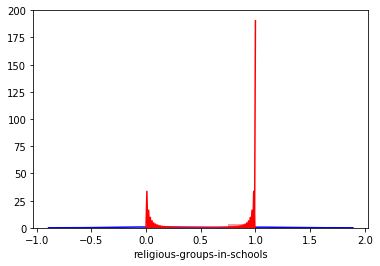

In [206]:
##### PLOT AMBIVALENT FEATURE TO CONFIRM

sns.distplot(dem_sample['religious-groups-in-schools'], color='b')
sns.distplot(gop_sample['religious-groups-in-schools'], color='r');